# Essentia Python tutorial

This is a hands-on tutorial for complete newcomers to Essentia. Essentia combines the power of computation speed of the main C++ code with the Python environment which makes fast prototyping and scientific research very easy.

First and foremost, if you are a newbie to Python, we recommend you to use [Ipython](https://ipython.org/) interactive shell or [Jupyter python notebooks](http://jupyter.org/) instead of the standard python interpreter. If you are familiar with python notebooks, you may want to use one created for this tutorial for a more interactive experience. It can be found in the ```src/examples/tutorial``` folder in the ```essentia_python_tutorial.ipynb``` file. Read how to use python notebooks [here](http://jupyter.readthedocs.io). 


You should have the [NumPy](http://numpy.scipy.org/) package installed, which gives Python the ability to work with vectors and matrices in pretty much the same way as Matlab. You can also install [SciPy](http://www.scipy.org/), which provides functionality similar to Matlab’s toolboxes, although we won’t be using it in this tutorial. You should have the [matplotlib](http://matplotlib.sourceforge.net/) package installed if you want to be able to do some plotting. Other recommended packages include [scikit-learn](http://scikit-learn.org/) for data analysis and machine learning and [seaborn](https://stanford.edu/~mwaskom/software/seaborn/) for visualization. 


The big strength of Essentia is in its considerably large collection of algorithms for audio processing and analysis which have been optimized and tested and which you can rely on to build your own signal analysis. That is, often you do not have to chase around lots of toolboxes to be able to achieve what you want. For more details on the algorithms, have a look either at the [algorithms overview](http://essentia.upf.edu/documentation/algorithms_overview.html) or at the [complete reference](http://essentia.upf.edu/documentation/algorithms_reference.html).

## Using Essentia in standard mode

In this section we will focus on how to use Essentia in the *standard mode* (think Matlab). There is another section that you can read afterwards about using the streaming mode. 

We will have a look at some basic functionality:

 - how to load an audio
 - how to perform some numerical operations such as FFT
 - how to plot results
 - how to output results to a file
 
**Note**: all the following commands need to be typed in a python interpreter. You can use IPython (start it with the ```--pylab``` option to have interactive plots) or Jupyter notebooks.

### Exploring the python module

Let’s investigate a bit the Essentia package.

In [4]:
# first, we need to import our essentia module. It is aptly named 'essentia'!
import essentia

# as there are 2 operating modes in essentia which have the same algorithms,
# these latter are dispatched into 2 submodules:
import essentia.standard
import essentia.streaming

# let's have a look at what is in there
print(dir(essentia.standard))

# you can also do it by using autocompletion in IPython, typing "essentia.standard." and pressing Tab
    

['AfterMaxToBeforeMaxEnergyRatio', 'AllPass', 'AudioLoader', 'AudioOnsetsMarker', 'AudioWriter', 'AutoCorrelation', 'BFCC', 'BPF', 'BandPass', 'BandReject', 'BarkBands', 'BeatTrackerDegara', 'BeatTrackerMultiFeature', 'Beatogram', 'BeatsLoudness', 'BinaryOperator', 'BinaryOperatorStream', 'BpmHistogram', 'BpmHistogramDescriptors', 'BpmRubato', 'CartesianToPolar', 'CentralMoments', 'Centroid', 'ChordsDescriptors', 'ChordsDetection', 'ChordsDetectionBeats', 'Chromagram', 'Clipper', 'ConstantQ', 'Crest', 'CrossCorrelation', 'CubicSpline', 'DCRemoval', 'DCT', 'Danceability', 'Decrease', 'Derivative', 'DerivativeSFX', 'Dissonance', 'DistributionShape', 'Duration', 'DynamicComplexity', 'ERBBands', 'EasyLoader', 'EffectiveDuration', 'Energy', 'EnergyBand', 'EnergyBandRatio', 'Entropy', 'Envelope', 'EqloudLoader', 'EqualLoudness', 'Extractor', 'FFT', 'FFTC', 'FadeDetection', 'Flatness', 'FlatnessDB', 'FlatnessSFX', 'Flux', 'FrameCutter', 'FrameGenerator', 'FrameToReal', 'FreesoundExtractor', '

This list contains all Essentia algorithms available in standard mode. You can have an inline help for the algorithms you are interested in using ```help``` command (you can also see it by typing "*MFCC?*" in IPython). You can also use our online [algorithm reference](http://essentia.upf.edu/documentation/algorithms_reference.html).

In [3]:
help(essentia.standard.MFCC)

Help on class Algo in module essentia.standard:

class Algo(Algorithm)
 |  MFCC
 |  
 |  
 |  Inputs:
 |  
 |    [vector_real] spectrum - the audio spectrum
 |  
 |  
 |  Outputs:
 |  
 |    [vector_real] bands - the energies in mel bands
 |    [vector_real] mfcc - the mel frequency cepstrum coefficients
 |  
 |  
 |  Parameters:
 |  
 |    dctType:
 |      integer ∈ [2,3] (default = 2)
 |      the DCT type
 |  
 |    highFrequencyBound:
 |      real ∈ (0,inf) (default = 11000)
 |      the upper bound of the frequency range [Hz]
 |  
 |    inputSize:
 |      integer ∈ (1,inf) (default = 1025)
 |      the size of input spectrum
 |  
 |    liftering:
 |      integer ∈ [0,inf) (default = 0)
 |      the liftering coefficient. Use '0' to bypass it
 |  
 |    logType:
 |      string ∈ {natural,dbpow,dbamp,log} (default = "dbamp")
 |      logarithmic compression type. Use 'dbpow' if working with power and 'dbamp'
 |      if working with magnitudes
 |  
 |    lowFrequencyBound:
 |      real ∈ 

### Instantiating our first algorithm, loading some audio

Before you can use algorithms in Essentia, you first need to instantiate (create) them. When doing so, you can give them parameters which they may need to work properly, such as the filename of the audio file in the case of an audio loader.

Once you have instantiated an algorithm, nothing has happened yet, but your algorithm is ready to be used and works like a function, that is, *you have to call it to make stuff happen* (technically, it is a [function object]( <http://en.wikipedia.org/wiki/Function_object>)).

Essentia has a selection of audio loaders:

- [AudioLoader](http://essentia.upf.edu/documentation/reference/std_AudioLoader.html): the most generic one, returns the audio samples, sampling rate and number of channels, and some other related information
- [MonoLoader](http://essentia.upf.edu/documentation/reference/std_MonoLoader.html): returns audio, down-mixed and resampled to a given sampling rate
- [EasyLoader](http://essentia.upf.edu/documentation/reference/std_EasyLoader.html): a MonoLoader which can optionally trim start/end slices and rescale according to a ReplayGain value
- [EqloudLoader](http://essentia.upf.edu/documentation/reference/std_EqloudLoader.html): an EasyLoader that applies an equal-loudness filtering to the audio


In [5]:
# we start by instantiating the audio loader:
loader = essentia.standard.MonoLoader(filename='../../../test/audio/recorded/dubstep.wav')

# and then we actually perform the loading:
audio = loader()

In [2]:
# This is how the audio we want to process sounds like
import IPython
IPython.display.Audio('../../../test/audio/recorded/dubstep.wav')

By default, the MonoLoader will output audio with 44100Hz sample rate downmixed to mono. To make sure that this actually worked, let's plot a 1-second slice of audio, from t = 1 sec to t = 2sec:

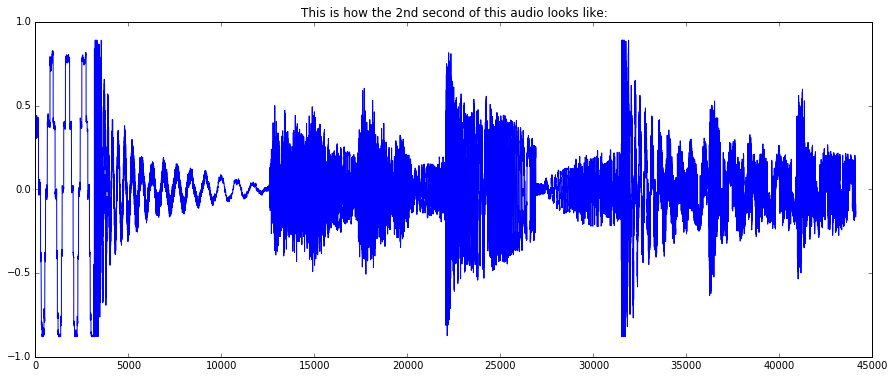

In [6]:
# pylab contains the plot() function, as well as figure, etc... (same names as Matlab)
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default

plot(audio[1*44100:2*44100])
plt.title("This is how the 2nd second of this audio looks like:")
show() # unnecessary if you started "ipython --pylab"

Note that if you have started IPython with the ``--pylab`` option, the call to
show() is not necessary, and you don't have to close the plot to regain control of your terminal.

### Computing spectrum, mel bands energies, and MFCCs
So let's say that we want to compute spectral energy in mel bands and the associated [MFCCs](http://en.wikipedia.org/wiki/Mel-frequency_cepstral_coefficient) for the frames in our audio.

We will need the following algorithms: Windowing, Spectrum, MFCC. For windowing, we'll specify to use Hann window.

In [7]:
from essentia.standard import *
w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = MFCC()

Once algorithms have been instantiated, they work like normal functions. Note that the MFCC algorithm returns two values: the band energies and the coefficients. You can get (unpack) them the same way as in Matlab. Let's compute and plot the spectrum, mel band energies, and MFCCs for a frame of audio:

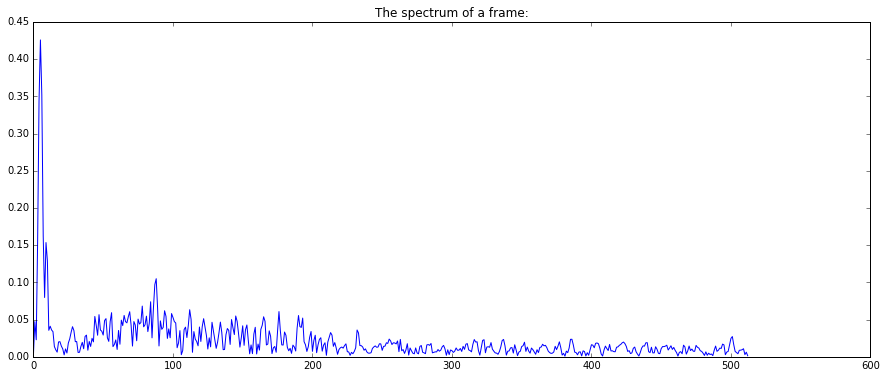

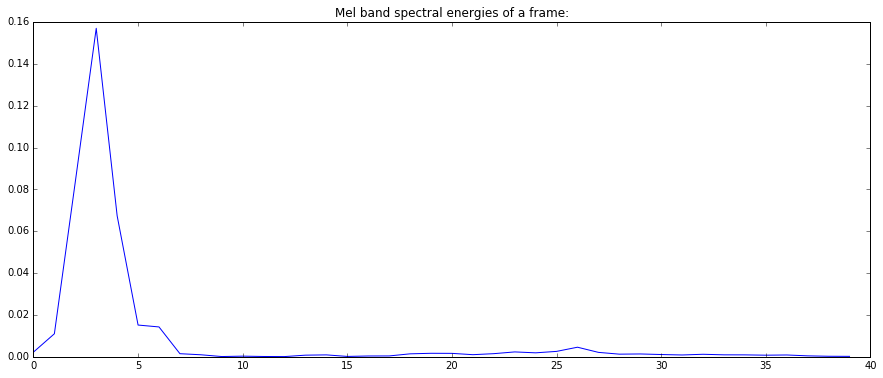

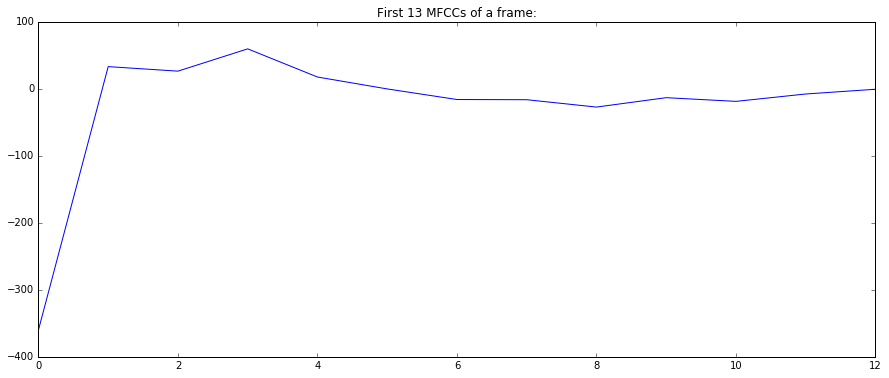

In [7]:
frame = audio[6*44100 : 6*44100 + 1024]
spec = spectrum(w(frame))
mfcc_bands, mfcc_coeffs = mfcc(spec)

plot(spec)
plt.title("The spectrum of a frame:")
show()

plot(mfcc_bands)
plt.title("Mel band spectral energies of a frame:")
show()

plot(mfcc_coeffs)
plt.title("First 13 MFCCs of a frame:")
show()

In the case of mel band energies, sometimes you may want to apply log normalization, which can be done using [UnaryOperator](http://essentia.upf.edu/documentation/reference/std_UnaryOperator.html). Using this algorithm we can do different types of normalization on vectors.

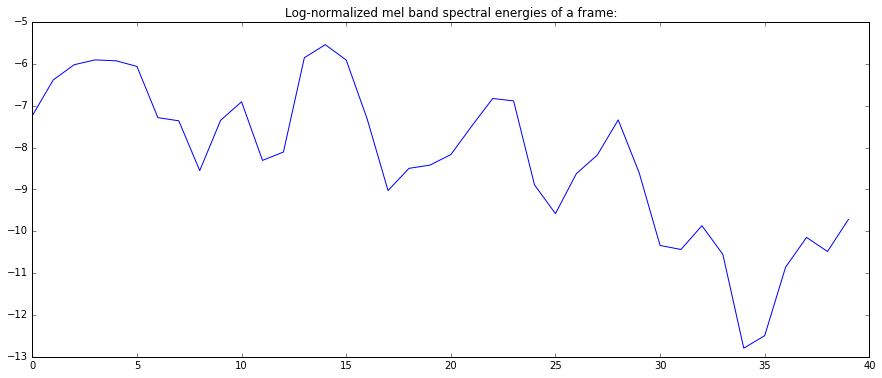

In [10]:
logNorm = UnaryOperator(type='log')
plot(logNorm(mfcc_bands))
plt.title("Log-normalized mel band spectral energies of a frame:")
show()

### Computations on frames
Now let's compute the mel band energies and MFCCs in all frames.

The way we would do it in Matlab is by slicing the frames manually (the first frame starts at moment 0, i.e., with the first audio sample):

In [8]:
mfccs = []
melbands = []
frameSize = 1024
hopSize = 512

for fstart in range(0, len(audio)-frameSize, hopSize):
    frame = audio[fstart:fstart+frameSize]
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    mfccs.append(mfcc_coeffs)
    melbands.append(mfcc_bands)

This is ok, but there is a much nicer way of computing frames in Essentia by using *FrameGenerator*, the [FrameCutter](http://essentia.upf.edu/documentation/reference/std_FrameCutter.html) algorithm wrapped into a python generator:

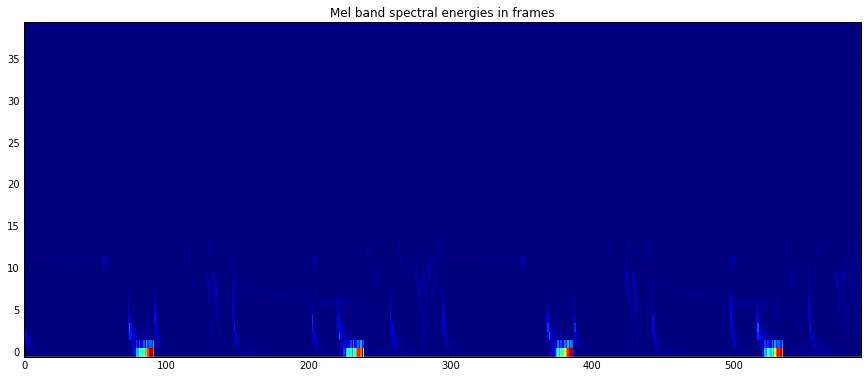

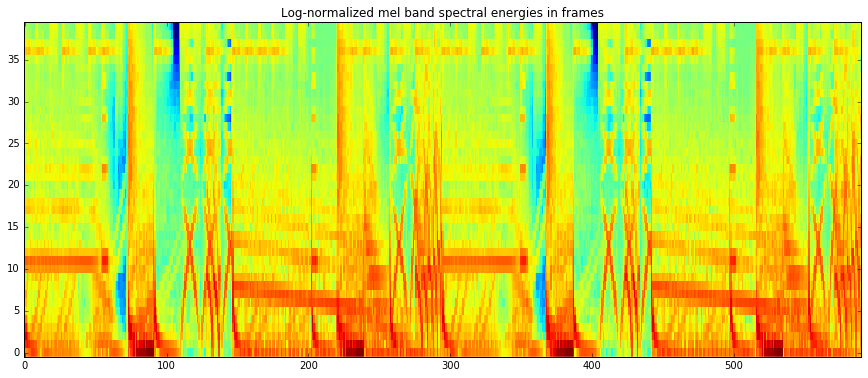

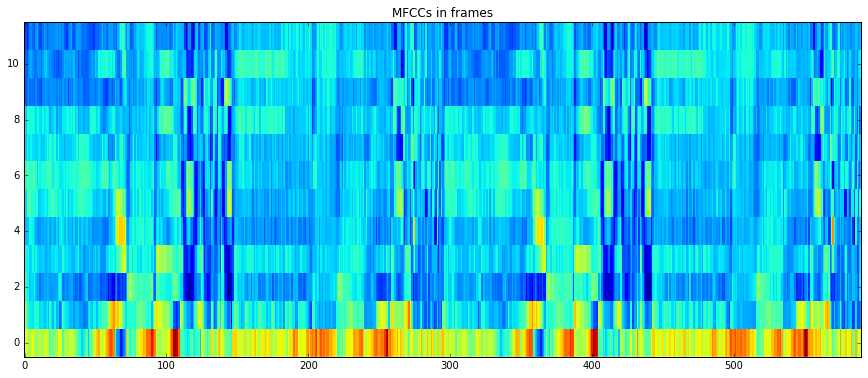

In [11]:
mfccs = []
melbands = []
melbands_log = []

for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    mfccs.append(mfcc_coeffs)
    melbands.append(mfcc_bands)
    melbands_log.append(logNorm(mfcc_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
mfccs = essentia.array(mfccs).T
melbands = essentia.array(melbands).T
melbands_log = essentia.array(melbands_log).T

# and plot
imshow(melbands[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
show()

imshow(melbands_log[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-normalized mel band spectral energies in frames")
show()

imshow(mfccs[1:,:], aspect='auto', origin='lower', interpolation='none')
plt.title("MFCCs in frames")
show()

You can configure frame and hop size of the frame generator, and whether to start the first frame or to center it at zero position in time. For the complete list of available parameters see the documentation for the [FrameCutter](http://essentia.upf.edu/documentation/reference/std_FrameCutter.html).

Note, that when plotting MFCCs, we ignored the first coefficient to disregard the power of the signal and only plot its spectral shape.


### Storing results to Pool
A **Pool** is a container similar to a C++ map or Python dict which can contain any type of values (easy in Python, not as much in C++...). Values are stored in there using a name which represents the full path to these values; dot ('.') characters are used as separators. You can think of it as a directory tree, or as namespace(s) + local name.

Examples of valid names are: ``"bpm"``, ``"lowlevel.mfcc"``, ``"highlevel.genre.rock.probability"``, etc...

Let's redo the previous computations using a pool. The pool has the nice advantage that the data you get out of it is already in an ``essentia.array`` format (which is equal to numpy.array of floats), so you can call transpose (``.T``) directly on it.

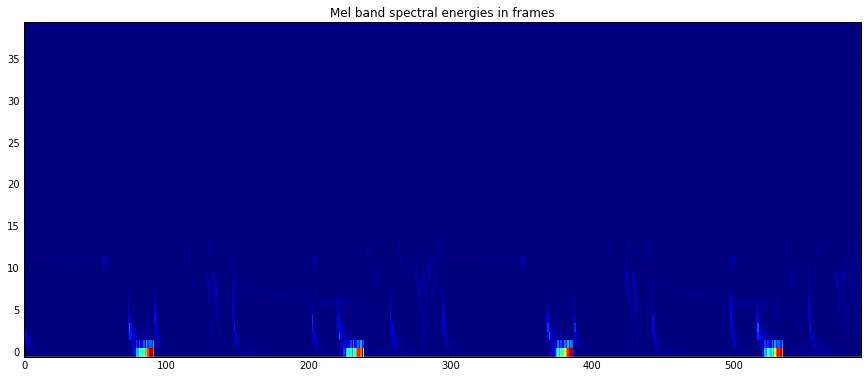

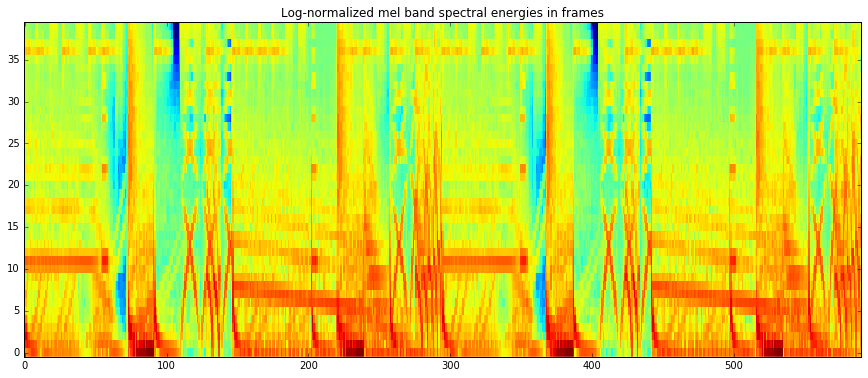

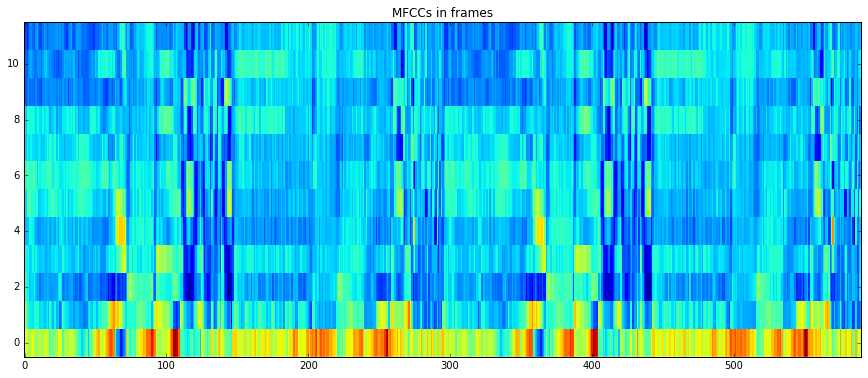

In [13]:
pool = essentia.Pool()

for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512, startFromZero=True):
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    pool.add('lowlevel.mfcc', mfcc_coeffs)
    pool.add('lowlevel.mfcc_bands', mfcc_bands)
    pool.add('lowlevel.mfcc_bands_log', logNorm(mfcc_bands))

imshow(pool['lowlevel.mfcc_bands'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
show()

imshow(pool['lowlevel.mfcc_bands_log'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-normalized mel band spectral energies in frames")
show()

imshow(pool['lowlevel.mfcc'].T[1:,:], aspect='auto', origin='lower', interpolation='none')
plt.title("MFCCs in frames")
show()

### Aggregation and file output
As we are using such a nice language as Python, we could use its facilities for writing data to a file, but for the sake of this tutorial let's do it using the [YamlOutput](http://essentia.upf.edu/documentation/reference/std_YamlOutput.html) algorithm, which writes a pool in a file using the [YAML](http://yaml.org/) or [JSON](http://en.wikipedia.org/wiki/JSON) format.

In [11]:
output = YamlOutput(filename = 'mfcc.sig') # use "format = 'json'" for JSON output
output(pool)

# or as a one-liner:
YamlOutput(filename = 'mfcc.sig')(pool)

This can take a while as we actually write the MFCCs for all the frames, which
can be quite heavy depending on the duration of your audio file.

Now let's assume we do not want all the frames but only the mean and standard deviation of those frames. We can do this using the [PoolAggregator](http://essentia.upf.edu/documentation/reference/std_PoolAggregator.html) algorithm on our pool with frame value to get a new pool with the aggregated descriptors (check the documentation for this algorithm to get an idea of other statistics it can compute):

In [18]:
# compute mean and variance of the frames
aggrPool = PoolAggregator(defaultStats = [ 'mean', 'stdev' ])(pool)

print('Original pool descriptor names:')
print(pool.descriptorNames())
print('')
print('Aggregated pool descriptor names:')
print(aggrPool.descriptorNames())
print('')

# and ouput those results in a file
YamlOutput(filename = 'mfccaggr.sig')(aggrPool)

Original pool descriptor names:
['lowlevel.mfcc', 'lowlevel.mfcc_bands', 'lowlevel.mfcc_bands_log']

Aggregated pool descriptor names:
['lowlevel.mfcc.mean', 'lowlevel.mfcc.stdev', 'lowlevel.mfcc_bands.mean', 'lowlevel.mfcc_bands.stdev', 'lowlevel.mfcc_bands_log.mean', 'lowlevel.mfcc_bands_log.stdev']



This is how the file with aggregated descriptors looks like:

In [17]:
!cat mfccaggr.sig


metadata:
    version:
        essentia: "2.1-dev"

lowlevel:
    mfcc:
        mean: [-548.465515137, 82.474647522, 23.9920558929, -3.92105984688, 9.37707233429, 0.0550536848605, 7.49981355667, 10.2677164078, 1.46692347527, 8.78695869446, -1.02505850792, 5.55843877792, -4.53198575974]
        stdev: [92.9804992676, 38.1891860962, 32.8111877441, 25.9349346161, 23.5974235535, 22.8900985718, 23.4571056366, 19.2605209351, 16.999912262, 17.3296813965, 18.9442825317, 18.8146419525, 16.8438053131]
    mfcc_bands:
        mean: [0.0430443286896, 0.0152214923874, 0.00659069558606, 0.00539278704673, 0.00387320877053, 0.00304042594507, 0.00343433767557, 0.00261196284555, 0.0023196185939, 0.00208778819069, 0.00157481990755, 0.00235125259496, 0.0010298260022, 0.000758393900469, 0.000447986851213, 0.000321425526636, 0.000237083833781, 0.000205824428122, 0.000197611472686, 0.000161219315487, 0.00013125318219, 0.000133611785714, 0.000161335541634, 0.000107279069198, 0.000109758009785, 0.000123509569

### Summary and more examples
There is not much more to know for using Essentia in standard mode in Python, the basics are:

* instantiate and configure algorithms
* use them to compute some results
* and that's pretty much it!

You can find a number of python examples in the ```src/examples/tutorial``` folder in the code, including:

* computing spectral centroid ([example_spectralcentroid.py](https://github.com/MTG/essentia/blob/master/src/examples/tutorial/example_spectralcentroid.py))
* onset detection ([example_onsetdetection.py](https://github.com/MTG/essentia/blob/master/src/examples/tutorial/example_onsetdetection.py))
* predominant melody detection ([example_predominantmelody.py](https://github.com/MTG/essentia/blob/master/src/examples/tutorial/example_predominantmelody.py) and [example_predominantmelody_by_steps.py](https://github.com/MTG/essentia/blob/master/src/examples/tutorial/example_predominantmelody_by_steps.py))



## Using Essentia in streaming mode

In this section, we will consider how to use Essentia in streaming mode.

The main difference between standard and streaming is that the standard mode is imperative while the streaming mode is declarative. That means that in standard mode, you tell exactly the computer what to do, whereas in the streaming mode, you "declare"  what is needed to be done, and you let the computer do it itself. One big advantage of the streaming mode is that the memory consumption is greatly reduced, as you don't need to load the entire audio in memory. Also, streaming mode allows reducing the amount of code which may be very significant for larger projects. Let's have a look at it.



As usual, first import the essentia module:

In [14]:
import essentia
from essentia.streaming import *

Instantiate our algorithms:

In [15]:
loader = MonoLoader(filename = '../../../test/audio/recorded/dubstep.wav')
frameCutter = FrameCutter(frameSize = 1024, hopSize = 512)
w = Windowing(type = 'hann')
spec = Spectrum()
mfcc = MFCC()

In streaming, instead of calling algorithms like functions, we need to connect their inputs and outputs. This is done using the >> operator.

For example, the graph we want to connect looks like this:

```
----------      ------------      -----------      --------------      --------------
MonoLoader      FrameCutter       Windowing        Spectrum            MFCC
     audio ---> signal frame ---> frame frame ---> frame spectrum ---> spectrum bands ---> ???
                                                                                mfcc  ---> ???
----------      ------------      -----------      --------------      --------------
```


In [16]:
loader.audio >> frameCutter.signal
frameCutter.frame >> w.frame >> spec.frame
spec.spectrum >> mfcc.spectrum

When building a network, all inputs need to be connected, no matter what, otherwise the network cannot be started and we get an error message:

In [17]:
essentia.run(loader)

RuntimeError: MFCC::bands is not connected to any sink...

In our case, the outputs of the MFCC algorithm were not connected anywhere. Let's store *mfcc* values in the pool and ignore *bands* values.

```
----------      ------------      -----------      --------------      --------------
MonoLoader      FrameCutter       Windowing        Spectrum            MFCC
     audio ---> signal frame ---> frame frame ---> frame spectrum ---> spectrum bands ---> NOWHERE
                                                                                mfcc  ---> Pool: lowlevel.mfcc
----------      ------------      -----------      --------------      --------------
```

In [19]:
pool = essentia.Pool()

mfcc.bands >> None
mfcc.mfcc >> (pool, 'lowlevel.mfcc')

essentia.run(loader)

print('Pool contains %d frames of MFCCs' % len(pool['lowlevel.mfcc']))

Pool contains 592 frames of MFCCs


### Let's try writing directly to a text file instead of a pool and yaml files

We first need to disconnect the old connection to the pool to avoid putting the same data in there again.

In [20]:
mfcc.mfcc.disconnect((pool, 'lowlevel.mfcc'))

We create a FileOutput and connect it. It is a special connection that has no input because it can actually take any type of input (the other algorithms will complain if you try to connect an output to an input of a different type).

In [21]:
fileout = FileOutput(filename = 'mfccframes.txt')
mfcc.mfcc >> fileout

<essentia.streaming._create_streaming_algo.<locals>.StreamingAlgo at 0x7f11815d5d38>

Reset the network otherwise the loader in particular will not do anything useful, and rerun the network

In [22]:
essentia.reset(loader)
essentia.run(loader)

This is the resulting file (the first 10 lines correspond to the first 10 frames):

In [9]:
!head mfccframes.txt -n 10

[-430.671, 87.7917, -10.1204, -50.172, -17.9259, -36.4849, -17.5709, -5.72504, -16.6404, 8.64975, -7.41039, 5.7051, 7.18055]
[-490.824, 101.549, 68.3375, 10.5324, 9.86464, -21.2722, -12.467, -11.8749, -24.2667, -8.02748, -26.5459, -25.3716, -31.5997]
[-515.915, 90.4185, 54.5073, 25.2965, 18.2453, 1.56025, 10.0262, 21.2547, 2.83289, 7.16083, -25.8393, -22.4263, -29.8229]
[-526.075, 76.321, 33.0371, 15.6267, 16.1482, 1.94901, 26.5443, 40.805, 20.866, 20.7323, -16.962, -23.6936, -39.9292]
[-530.409, 62.8531, 17.8901, 17.2312, 19.4443, 6.44692, 35.9218, 37.0124, 9.91326, 30.9235, -10.691, -12.6595, -30.0003]
[-532.03, 66.9765, 15.174, 4.41039, 6.51187, 18.4618, 41.4819, 30.0178, 13.5438, 19.5735, -19.7553, -2.62841, -12.9201]
[-523.106, 85.9242, 15.2094, 11.4087, 9.95426, 19.4773, 20.8585, 27.0054, 19.3617, 19.016, -13.5927, -3.25358, -11.339]
[-532.996, 90.4333, 13.19, 8.79797, 20.2316, 15.791, 23.7306, 34.2449, 11.5618, 20.3763, -18.6916, -10.9794, -20.2573]
[-539.285, 74.0864, 20.9641, 

### Examples

* extracting key by steps ([example_key_by_steps_streaming.py](https://github.com/MTG/essentia/blob/master/src/examples/tutorial/example_key_by_steps_streaming.py))